In [1]:
import matplotlib.pyplot as plt

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()

X_iris = data.data
y_iris = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
import pandas as pd

pd.DataFrame(X_iris)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
pd.Series(y_iris)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64

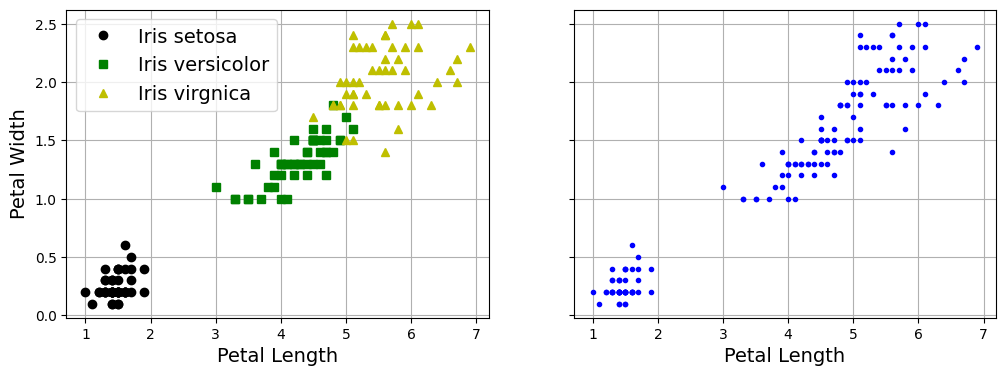

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
ax[0].plot(
    X_iris[y_iris == 0, 2],
    X_iris[y_iris == 0, 3],
    "ko",
    label="Iris setosa",
)
ax[0].plot(
    X_iris[y_iris == 1, 2],
    X_iris[y_iris == 1, 3],
    "gs",
    label="Iris versicolor",
)
ax[0].plot(
    X_iris[y_iris == 2, 2],
    X_iris[y_iris == 2, 3],
    "y^",
    label="Iris virgnica",
)
ax[0].set_xlabel("Petal Length")
ax[0].set_ylabel("Petal Width")
ax[0].grid()
ax[0].legend()

ax[1].plot(X_iris[:, 2], X_iris[:, 3], "b.")
ax[1].set_xlabel("Petal Length")
ax[1].grid()

plt.show()

# Unsupervised Learning

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_center = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X_blob, y_blob = make_blobs(
    n_samples=2000, centers=blob_center, cluster_std=blob_std, random_state=42
)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_blob)

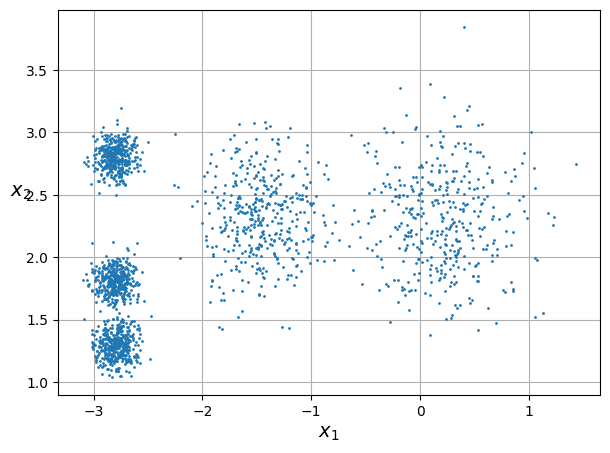

In [7]:
def clustering(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(7, 5))
clustering(X_blob)
plt.gca().set_axisbelow(True)
plt.grid()

In [8]:
iris = load_iris(as_frame=True)

X_iris = iris.data

k_clusters = 5
iris_kmeans = KMeans(n_clusters=k_clusters, random_state=42)
iris_cluster = iris_kmeans.fit_predict(X_iris)

X_iris['iris_cluster'] = iris_cluster
print(X_iris.head())
print(f"Centroids: ", iris_kmeans.cluster_centers_)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   iris_cluster  
0             1  
1             1  
2             1  
3             1  
4             1  
Centroids:  [[6.24722222 2.84722222 4.775      1.575     ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [7.475      3.125      6.3        2.05      ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]]


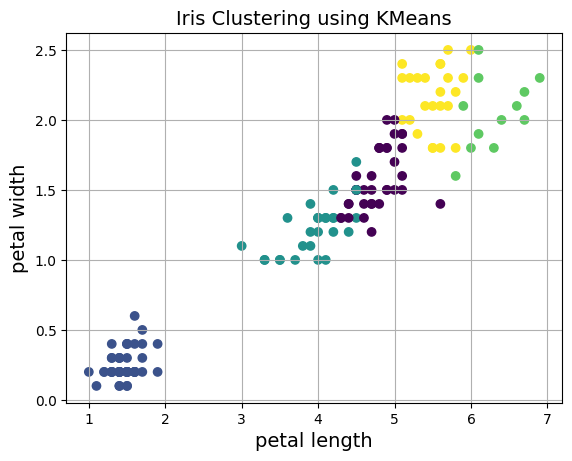

In [10]:
plt.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'], c=iris_cluster, cmap="viridis")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.grid()
plt.title("Iris Clustering using KMeans")
plt.show()